In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

In [187]:
madrid_dataset = pd.read_pickle("01_data_processed.pkl")

In [188]:
madrid_dataset

,Season,Matchday,Home,Rival,Madrid_Goals,Rival_Goals,Madrid_Goals_FH,Rival_Goals_FH,Madrid_Win,Draw,Madrid_Lose,Over_2_5,Under_2_5,Total_Goals,FH_Goals,Result_HT,Result,Points
0,20,1,0,Celta Vigo,3,1,1,0,1650.0,4460.0,5100.0,1490,2760,4,1,W,W,3
1,20,2,1,Valladolid,1,1,0,0,1230.0,7320.0,13120.0,1400,3100,2,0,D,D,4
2,20,3,0,Villarreal,2,2,1,1,1940.0,4070.0,3730.0,1400,3110,4,2,D,D,5
3,20,4,1,Levante,3,2,3,0,1270.0,6800.0,9990.0,1260,4150,5,3,W,W,8
4,20,5,0,FC Sevilla,1,0,0,0,2640.0,3780.0,2580.0,1500,2720,1,0,D,W,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,23,34,1,Getafe,1,0,0,0,1600.0,4110.0,6320.0,2010,1900,1,0,D,W,71
148,23,35,0,Valencia,0,1,0,1,2250.0,3720.0,3240.0,1730,2220,1,1,L,L,71
149,23,36,1,Vallecano,2,1,1,0,1410.0,5140.0,8140.0,1540,2610,3,1,W,W,74
150,23,37,0,FC Sevilla,2,1,1,1,2310.0,3580.0,3220.0,1790,2120,3,2,D,W,77


In [189]:
mpl.style.use("seaborn-v0_8-deep")
mpl.rcParams["figure.figsize"] = (20,5)
mpl.rcParams["figure.dpi"] = 100
mpl.rcParams['lines.linestyle'] = '--'

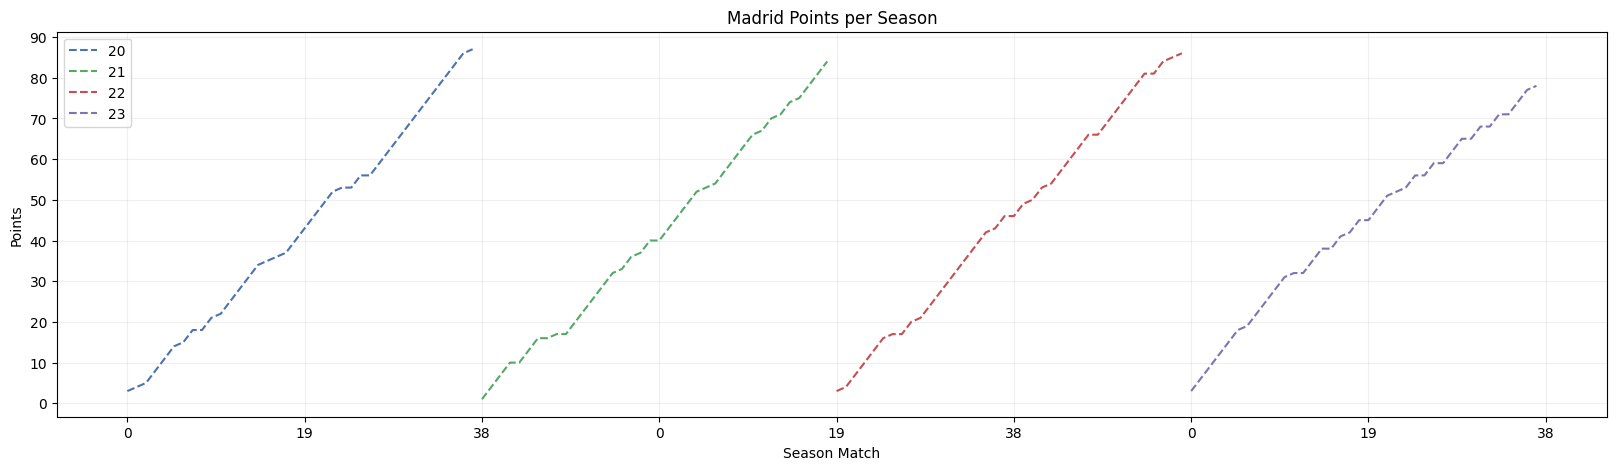

In [190]:
x_ticks = [0, 19, 38, 57, 76, 95, 114, 133, 152]
y_ticks = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
x_labels = ['0', '19', '38','0', '19', '38','0', '19', '38']

fig, ax = plt.subplots()
madrid_dataset.groupby(["Season"])["Points"].plot()

plt.yticks(y_ticks)
plt.xticks(x_ticks, x_labels)

ax.grid(which = "major", alpha = 0.2)
plt.xlabel("Season Match")
plt.ylabel("Points")
plt.title("Madrid Points per Season")
plt.legend()

In [191]:
goals = madrid_dataset.groupby(["Season"])[["Madrid_Goals","Rival_Goals","Madrid_Goals_FH", "Rival_Goals_FH"]].sum()

<Axes: xlabel='Season', ylabel='No. of Goals'>

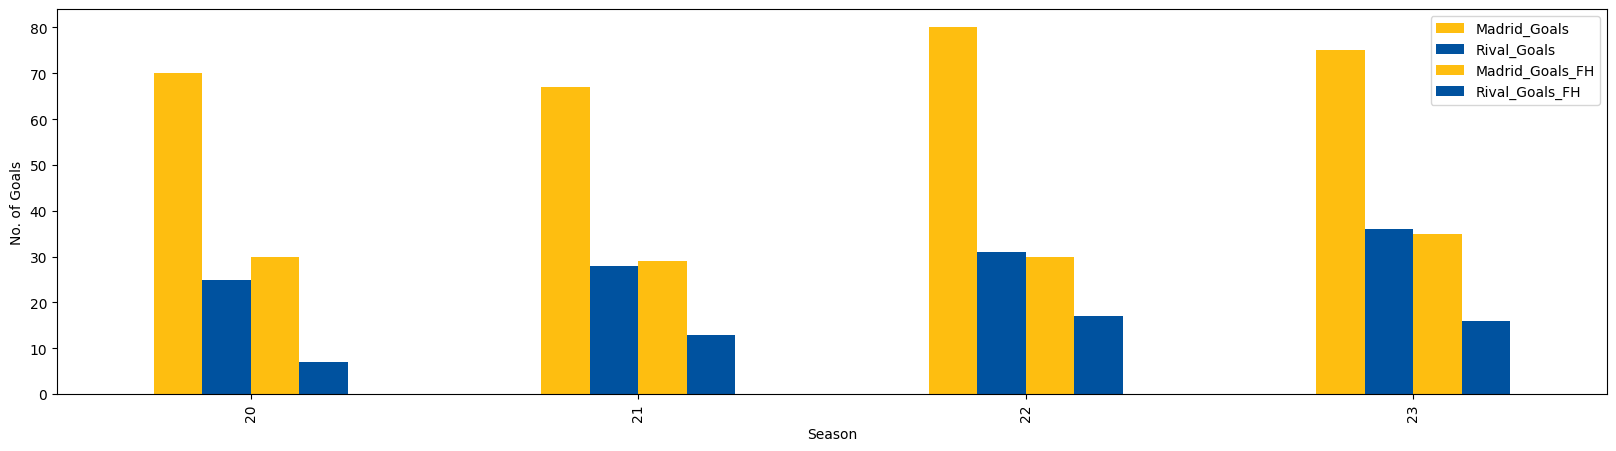

In [193]:
goals.plot(kind = "bar", color = ['#febe10','#00529f'], ylabel = "No. of Goals")

In [194]:
wins = []
draw = []
loses = []
for season in madrid_dataset['Season'].unique():
    wins.append(len(madrid_dataset[(madrid_dataset['Season'] == season) & (madrid_dataset['Result'] == "W")]))
    draw.append(len(madrid_dataset[(madrid_dataset['Season'] == season) & (madrid_dataset['Result'] == "L")]))
    loses.append(len(madrid_dataset[(madrid_dataset['Season'] == season) & (madrid_dataset['Result'] == "D")]))

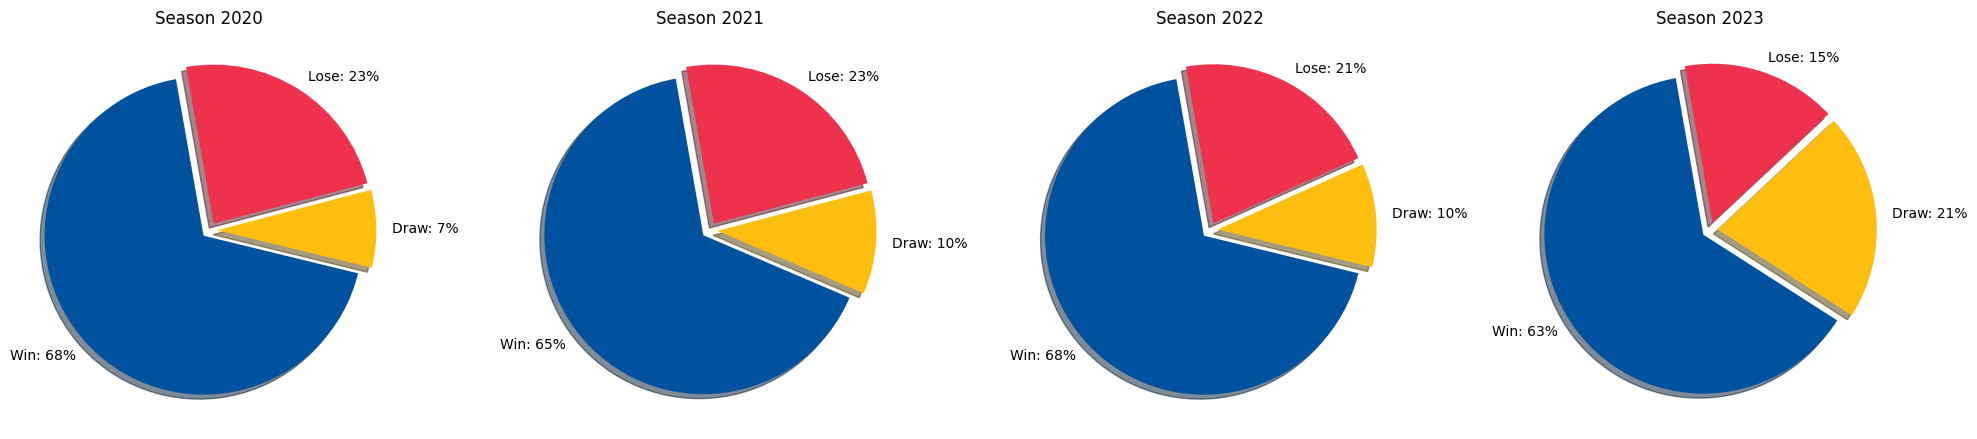

In [195]:
fig, ax = plt.subplots(nrows = 1, ncols = 4)
myexplode = [0.05, 0.05, 0.05]
mycolors = ["#00529f", "#febe10", "#ee324e"]
for i in range(len(wins)):
    data = [wins[i],draw[i],loses[i]]
    wp = int((wins[i]/38)*100)
    dp = int((draw[i]/38)*100)
    lp = int((loses[i]/38)*100)
    
    mylabels = [f"Win: {wp}%", f"Draw: {dp}%", f"Lose: {lp}%"]
    ax[i].pie(data, labels = mylabels, startangle = 100, explode = myexplode, colors = mycolors, shadow = True)
    
    s = 2020 + i
    ax[i].set_title(f"Season {s}")

plt.tight_layout()
plt.show() 

In [133]:
res_val = []
for i in range(len(madrid_dataset)):
    if madrid_dataset['Result'].iloc[i] == 'W':
        res_val.append(1)
    elif madrid_dataset['Result'].iloc[i] == 'D':
        res_val.append(0)
    else:
        res_val.append(-1)
if "res_val" not in madrid_dataset.columns:
        madrid_dataset.insert(17, "res_val", res_val, True)